In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,mean_squared_error,r2_score,precision_score,recall_score,f1_score


In [13]:
df = pd.read_csv("cleaned_data.csv")

In [14]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin']]
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R² Score:", r2)
print(model.coef_)

Mean Squared Error: 8.195452104073771
R² Score: 0.8475731044779437
[-0.26193105  1.45767491 -0.4501245  -5.7303316   0.20625996  2.9413812
  1.05202502]


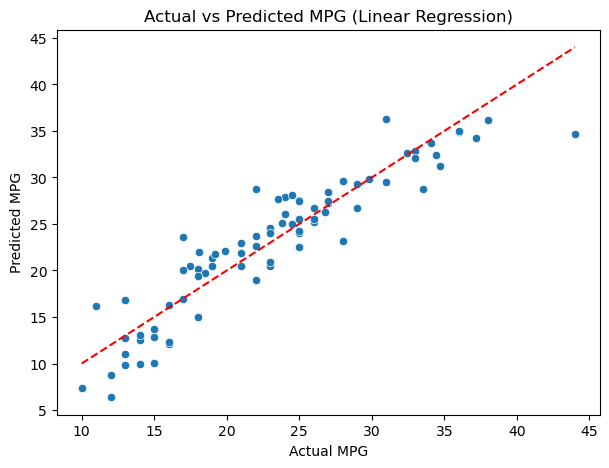

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Linear Regression)")
plt.show()

In [16]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin']]
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R² Score:", r2)
print(ridge.coef_)

Mean Squared Error: 8.203763221368105
R² Score: 0.8474185263300382
[-0.23218281  1.24232337 -0.49919685 -5.5284678   0.16423446  2.9170293
  1.04273528]


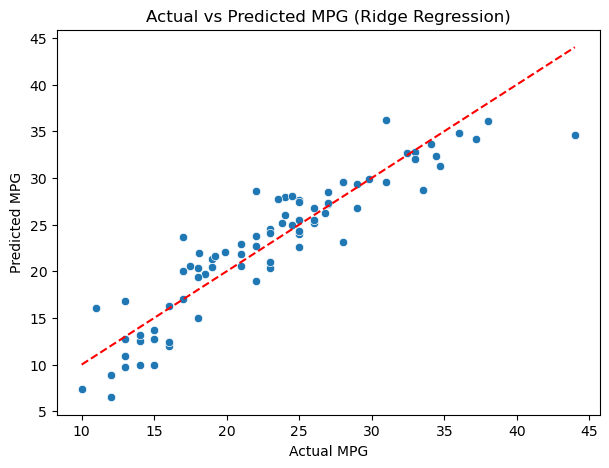

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Ridge Regression)")
plt.show()

In [18]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': list(range(1, 21))}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled, y)

best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("Test MSE:", mse_knn)
print("Test R²:", r2_knn)


Test MSE: 3.4659549999999997
Test R²: 0.935536837509362


In [19]:
bins = [0, 20, 30, np.inf]   
labels = ["Low", "Medium", "High"]  
y_class = pd.cut(df['mpg'], bins=bins, labels=labels)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

y_pred_clf = knn_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf)
precision = precision_score(y_test, y_pred_clf, average='weighted')
recall = recall_score(y_test, y_pred_clf, average='weighted')
f1 = f1_score(y_test, y_pred_clf, average='weighted')

print("accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)

accuracy: 0.85
Precision: 0.8510545905707196
Recall: 0.85
F1: 0.8502276867030965


Accuracy: 0.8625
Precision: 0.8692307692307691
Recall: 0.8625
F1 Score: 0.8630000000000001


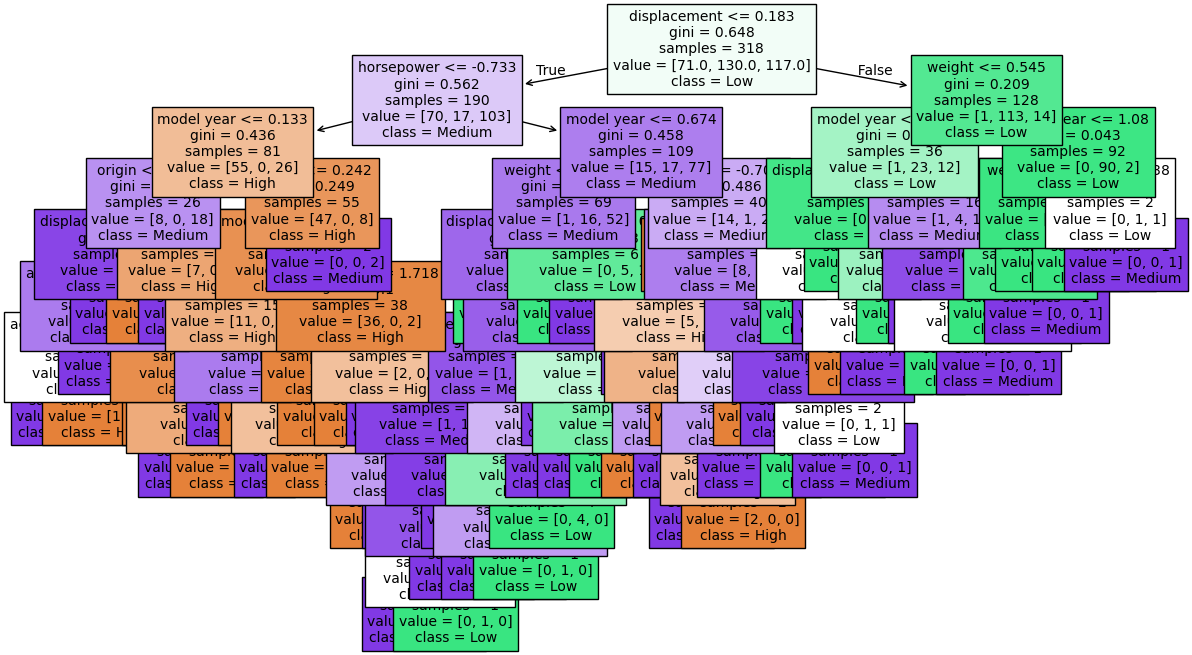

In [20]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model year', 'origin']]
y_class = pd.cut(df['mpg'], bins=[0,20,30,np.inf], labels=["Low","Medium","High"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True, fontsize=10)
plt.show()

Accuracy: 0.8
Precision: 0.82125
Recall: 0.8
F1 Score: 0.8041443850267381


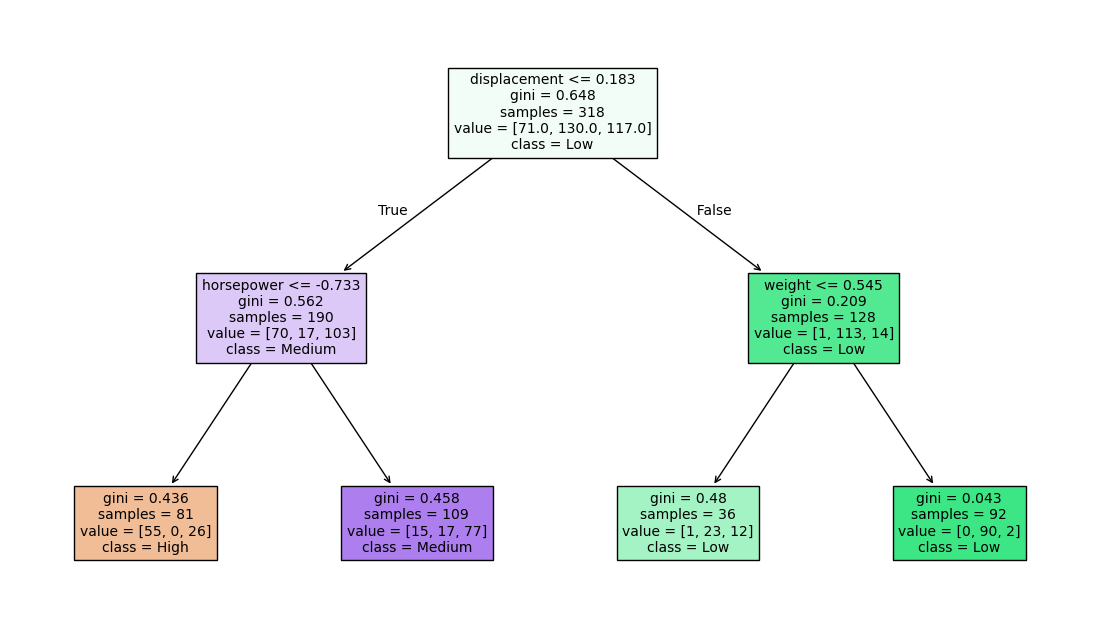

In [21]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight']]
y_class = pd.cut(df['mpg'], bins=[0,20,30,np.inf], labels=["Low","Medium","High"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=2, random_state=42)  
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True, fontsize=10)
plt.show()

In [ ]:
import pickle
X = df[["cylinders", "displacement", "horsepower", "weight",
        "acceleration", "origin"]]
y = df["mpg"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open("trained_model.sav", "wb") as f:
    pickle.dump((model, scaler), f)


with open("trained_model.sav", "rb") as f:
    model, scaler = pickle.load(f)

